In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.image as img
from sklearn.cluster import k_means
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier


In [2]:
# load the test_csv and train_csv
test_csv = pd.read_csv("test.csv")
train_csv = pd.read_csv("train.csv")
sample_csv = pd.read_csv("sample_submission.csv")

(784,)


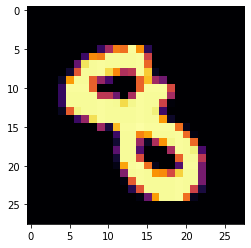

In [3]:
# displaying the number in pixelated form as image (vector points to image for our convenience)

df = pd.concat((train_csv, test_csv))

features = df.columns.drop('label')
print(features.shape)


dum = pd.get_dummies(df, columns=['label'])
df = pd.concat([df['label'], dum]) 

arr = np.asarray(np.array(train_csv.loc[np.random.randint(0, 784)][1:]).reshape(-28, 28))
plt.imshow(arr, cmap='inferno', vmin=0, vmax=255)
plt.show()

In [4]:
X_train = train_csv.drop(['label'], axis=1)
y_train = train_csv['label']

X_train = X_train.values.reshape(-784,784)
test_csv = (test_csv).values.reshape(-28,28)

In [5]:
y_train = y_train.values.reshape(-1,1)
y_train = OneHotEncoder(sparse=False).fit_transform(y_train)

In [6]:
# train test split of X_train and y_train with reshaping
KX_train, KX_test, KY_train, KY_test = train_test_split(X_train, y_train, test_size=0.2, random_state=452)

In [7]:
'''
# Image representation of the data after preprocessing

imageviewer = plt.imshow(X_train[np.random.randint(0,783)][:,:,0], cmap='inferno', vmin=0, vmax=1)
'''


"\n# Image representation of the data after preprocessing\n\nimageviewer = plt.imshow(X_train[np.random.randint(0,783)][:,:,0], cmap='inferno', vmin=0, vmax=1)\n"

In [8]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(KX_train, KY_train)
predictuion =  knn.predict(KX_test)
knn.score(KX_test, KY_test)



0.964047619047619